## Trabalho Python - Extração de Conhecimento de Dados Biológicos

Ana Lisboa pg49831\
Angelina Eiras pg42861\
Bruna Almeida pg51187\
Luciana Martins pg49839

### Explicação dos Dados

A CYP2C9 é a enzima da subfamília CYP2C mais abundante no fígado humano e a que mais contribui para o metabolismo dos fármacos. Os polimorfismos que resultam numa diminuição da atividade enzimática são comuns no gene CYP2C9, o que, combinado com índices terapêuticos estreitos para vários substratos de fármacos essenciais, resulta em algumas questões importantes relacionadas com a segurança e a eficácia dos fármacos.\
Os genes CYP P450 estão envolvidos na formação e decomposição (metabolismo) de várias moléculas e substâncias químicas nas células. Especificamente, o CYP P450 2C9 desempenha um papel importante na oxidação de compostos xenobióticos e endógenos.\
Trabalhamos com dois datasets, ```'cyp2c9.csv'``` que contém uma classificação binária: dada uma cadeia _SMILES_ de medicamentos, __prevê a inibição__ do CYP2C9 e ainda ```'cyp2c9_features.csv'``` que contém vários atributos / características presentes em cada um dos _ids_.

In [1]:
import pandas as pd
import matplotlib.pyplot
from pandas.core.computation.check import NUMEXPR_INSTALLED


data_features = pd.read_csv('cyp2c9_features.csv',sep=',', index_col = 0)
data = pd.read_csv('cyp2c9.csv',sep=',', index_col = 0)

C:\Users\lucia\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Exploração dos Dados

In [2]:
print (data.shape)
print (data_features.shape)

(11934, 2)
(11934, 207)


In [3]:
data

,smiles,Y
ids,,
1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1
644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1
645164.0,CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...,0
...,...,...
16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0
16758815.0,C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2,0
16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0


In [4]:
data.describe()

,Y
count,11934.000000
mean,0.337272
std,0.472798
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df = data_features.reset_index()

In [6]:
df.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,...,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000
mean,11.274808,-0.879382,11.274808,0.192623,0.611521,355.016700,334.581007,354.626917,131.051114,0.0,...,0.101894,0.073571,0.011061,0.004190,0.009804,0.032261,0.000168,0.062929,0.127786,0.044076
std,2.689638,1.442954,2.689638,0.224866,0.191307,108.988404,103.017461,108.873587,40.828041,0.0,...,0.325473,0.271160,0.104592,0.064595,0.101878,0.189071,0.012945,0.250991,0.774506,0.213281
min,2.269884,-7.603764,2.269884,0.000000,0.021258,33.030000,30.006000,33.021465,14.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.896393,-1.063285,10.896393,0.043124,0.481696,289.292000,272.175000,289.024430,106.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.242406,-0.402087,12.242406,0.116725,0.632182,347.435000,327.159000,347.133635,128.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.924319,-0.062750,12.924319,0.237865,0.772312,409.507250,386.231750,409.140095,152.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.398045,3.500000,17.398045,3.811700,0.947210,1664.922000,1579.242000,1663.492300,606.000000,0.0,...,4.000000,3.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,26.000000,4.000000


In [86]:
df['MolLogP']

ids
1960010.0     2.66100
644851.0      3.79210
644890.0      2.73890
644968.0      1.06010
645164.0      2.28752
               ...   
16758814.0    0.13350
16758815.0    0.37390
16758816.0    1.00920
16758818.0    1.06960
10847630.0    0.96870
Name: MolLogP, Length: 11934, dtype: float64

In [7]:
coluna_a_adicionar = data.index
coluna_a_adicionar

Float64Index([ 1960010.0,   644851.0,   644890.0,   644968.0,   645164.0,
               6602688.0,  5768708.0,   645448.0,   645818.0,   645929.0,
              ...
              16758809.0, 16758810.0, 16758811.0, 16758812.0, 16758813.0,
              16758814.0, 16758815.0, 16758816.0, 16758818.0, 10847630.0],
             dtype='float64', name='ids', length=11934)

In [8]:
df['ids'] = coluna_a_adicionar
df = df.set_index('ids')
df

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
ids,,,,,,,,,,,,,,,,,,,,,
1960010.0,12.820479,-0.183140,12.820479,0.128619,0.457873,362.476,344.332,362.07590,126.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
644851.0,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,255.05632,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
644890.0,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,421.25900,164.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
644968.0,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,324.13348,122.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
645164.0,13.082813,-0.044883,13.082813,0.018472,0.457249,495.628,458.332,495.29578,194.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16758814.0,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,263.11575,102.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16758815.0,9.674588,-0.801690,9.674588,0.174259,0.635371,210.229,196.117,210.08920,82.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16758816.0,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,397.15253,152.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Realizamos estes passos para que as 2 tabelas ficassem com o mesmo índice e pudessemos trabalhar sobre ambas.

### Verificação de Valores Ausentes (NaN)

In [9]:
data.isna().sum()

smiles    0
Y         0
dtype: int64

In [10]:
df.isna().sum()

MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
qed                  0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 208, dtype: int64

Em ambos os datasets não há valores em falta.

In [11]:
data.apply(lambda x: str(x.min())+"---"+str(x.max()))

smiles    Br.C/C(=N/NC1=NCCN1)c1cn(C2=NCCN2)nc1C---c1nnc...
Y                                                     0---1
dtype: object

In [12]:
df.apply(lambda x: str(x.min())+"---"+str(x.max()))

MaxEStateIndex         2.2698839---17.398045
MinEStateIndex              -7.6037636---3.5
MaxAbsEStateIndex      2.2698839---17.398045
MinAbsEStateIndex               0.0---3.8117
qed                  0.021258056---0.9472098
                              ...           
fr_thiazole                        0.0---4.0
fr_thiocyan                        0.0---1.0
fr_thiophene                       0.0---2.0
fr_unbrch_alkane                  0.0---26.0
fr_urea                            0.0---4.0
Length: 208, dtype: object

In [13]:
for i in data.columns[1]:
    print(data[i].value_counts())

0    7909
1    4025
Name: Y, dtype: int64


Através desta análise é possível concluir que há mais SMILE drug que __não inibem__ o gene CYP2C9 do que aquelas que inibem.

In [14]:
graphic = df[data["Y"] == 1]
graphic

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
ids,,,,,,,,,,,,,,,,,,,,,
1960010.0,12.820479,-0.183140,12.820479,0.128619,0.457873,362.476,344.332,362.07590,126.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
644851.0,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,255.05632,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
644890.0,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,421.25900,164.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
644968.0,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,324.13348,122.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6602688.0,12.850702,-0.112825,12.850702,0.000000,0.506101,514.251,491.067,512.03815,160.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11025308.0,12.740918,-1.072524,12.740918,0.076823,0.539016,380.440,356.248,380.16238,146.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16758575.0,13.988702,-0.368662,13.988702,0.050064,0.435345,560.330,532.106,558.05176,168.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6636331.0,5.484438,0.429265,5.484438,0.429265,0.496236,306.365,288.221,306.13684,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
index = df.columns.get_loc("fr_Al_COO")
index #coluna do primeiro fragmento que aparece na tabela

123

In [16]:
frs = graphic.iloc[:, index:]
frs #colunas que representam os fragmentos

,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
ids,,,,,,,,,,,,,,,,,,,,,
1960010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
644851.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
644890.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
644968.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6602688.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11025308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16758575.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6636331.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
frs.describe()

,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,...,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.0,4025.000000,4025.000000,4025.000000
mean,0.019130,0.052671,0.042733,0.031553,0.011429,1.419379,0.107081,0.068571,0.030559,0.030559,...,0.164472,0.100373,0.014410,0.002733,0.013416,0.054907,0.0,0.108571,0.090683,0.033292
std,0.169439,0.253619,0.228798,0.185852,0.117413,1.456466,0.330991,0.346480,0.207490,0.207490,...,0.397907,0.311895,0.119188,0.052212,0.117203,0.240560,0.0,0.325198,0.500968,0.186217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4.000000,3.000000,3.000000,2.000000,2.000000,8.000000,4.000000,5.000000,4.000000,4.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.0,2.000000,13.000000,2.000000


In [18]:
frs.var()[frs.var() > 0.5]

fr_Ar_N            2.121294
fr_C_O             0.888310
fr_C_O_noCOO       0.856313
fr_NH0             2.282394
fr_NH1             0.594744
fr_alkyl_halide    0.743856
fr_amide           0.666303
fr_aniline         0.534637
fr_aryl_methyl     0.618849
fr_benzene         0.706404
fr_bicyclic        1.311414
fr_ether           0.961382
fr_halogen         1.306675
dtype: float64

In [19]:
frs.mean()[frs.mean() > 0.5]

fr_Ar_N         1.419379
fr_C_O          1.036770
fr_C_O_noCOO    1.006957
fr_NH0          2.091429
fr_NH1          0.764224
fr_amide        0.735404
fr_aniline      0.587578
fr_benzene      1.722733
fr_bicyclic     0.820373
fr_ether        0.799752
fr_halogen      0.649689
dtype: float64

<AxesSubplot: xlabel='ids'>

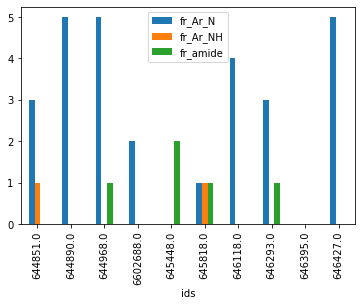

In [20]:
graphic.iloc[[1,2,3,4,5,6,7,8,9,10],[128,129,150]].plot.bar()

### Normalização

<AxesSubplot: xlabel='ids'>

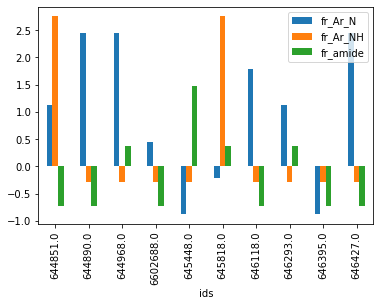

In [21]:
from sklearn import preprocessing

array_data = preprocessing.scale(df)
data_scale =  pd.DataFrame(array_data, index = df.index, columns = df.columns)
graphic = data_scale[data["Y"] == 1]
graphic.iloc[[1,2,3,4,5,6,7,8,9,10],[128,129,150]].plot.bar()

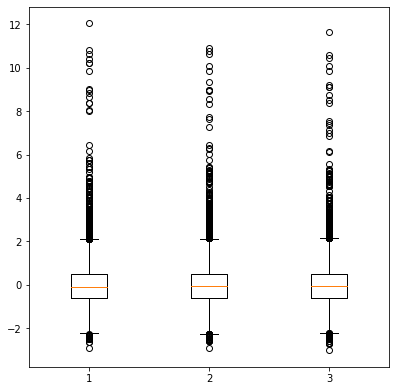

In [22]:
import matplotlib.pyplot as plt

boxplot_data = [data_scale["Chi0"], data_scale["Chi0n"], data_scale["Chi0v"]]
fig = plt.figure(figsize =(5, 5)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(boxplot_data) 
plt.show()

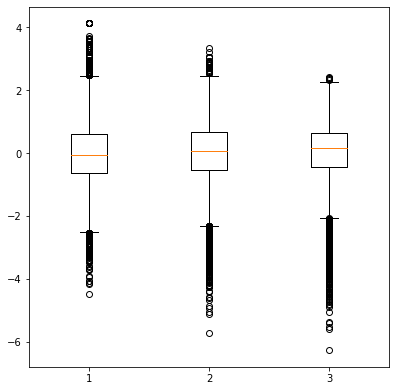

In [23]:
boxplot_data = [data_scale["FpDensityMorgan1"], data_scale["FpDensityMorgan2"], data_scale["FpDensityMorgan3"]]
fig = plt.figure(figsize =(5, 5)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(boxplot_data) 
plt.show()

### Transformação Logarítmica

In [24]:
import numpy as np

log_data = np.log2(df)
log_data.apply(lambda x: str(x.min())+"---"+str( x.max()))

C:\Users\lucia\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
C:\Users\lucia\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)


MaxEStateIndex          1.182618508451107---4.120853295946104
MinEStateIndex                      -inf---1.8073549220576042
MaxAbsEStateIndex       1.182618508451107---4.120853295946104
MinAbsEStateIndex                   -inf---1.9304345763454611
qed                  -5.55584651799473----0.07824408746540967
                                       ...                   
fr_thiazole                                        -inf---2.0
fr_thiocyan                                        -inf---0.0
fr_thiophene                                       -inf---1.0
fr_unbrch_alkane                     -inf---4.700439718141092
fr_urea                                            -inf---2.0
Length: 208, dtype: object

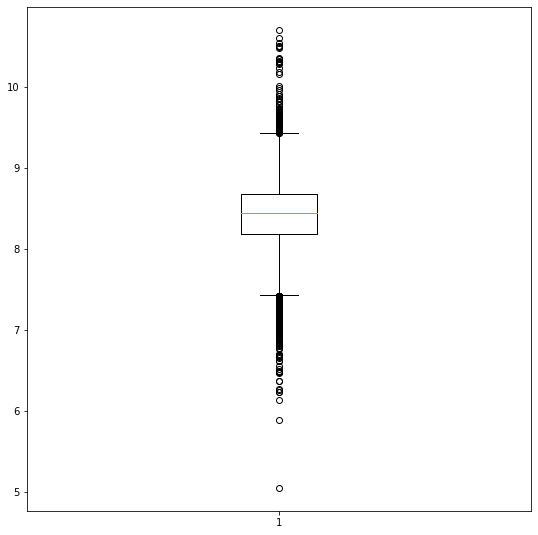

In [25]:
sel_log_data = log_data.iloc[:,5].values

fig = plt.figure(figsize =(7, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(sel_log_data) 
plt.show()

### Estatística Descritiva

(array([1505.,  816.,  841.,  357.,    0.,  416.,   66.,   20.,    2.,
           2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

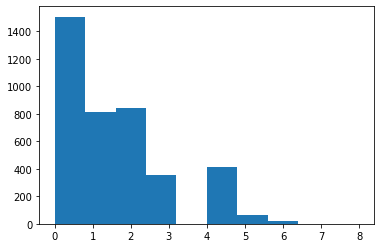

In [26]:
hist_data_1 = df["fr_Ar_N"][data["Y"] == 1]

plt.hist(hist_data_1)

(array([3813., 1067., 1441.,  493.,    0.,  941.,  107.,   34.,    0.,
          13.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

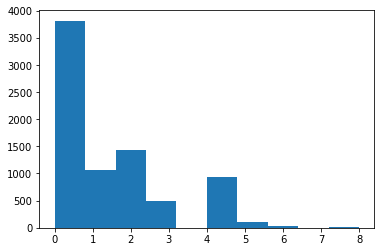

In [27]:
hist_data_2 = df["fr_Ar_N"][data["Y"] == 0]

plt.hist(hist_data_2)

__R:__ Após análise dos dois histogramas conseguimos perceber que, o fragmento _Ar\_N_ está mais presente a nível de contagens nas SMILE drugs que não inibem o gene CYP2C9 do que naquelas que o inibem o que nos pode levar a concluir de certa forma que a sua presença/ausência influencia a inibição ou não inibição do gene.

In [28]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(hist_data_1, hist_data_2, equal_var=True)
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.8f}".format(p_value))

t-test statistic: 5.18
p-value: 0.00000022


__R:__ Sendo _p\_value_ menor que 0.05, rejeita-se H0, pelo que se conclui que não há evidências significativas de que as médias das duas amostras sejam semelhantes.

In [29]:
from scipy import stats

databs_de_tt = lambda x : stats.ttest_ind(x[data['Y'] == 0],x[data['Y'] == 1])

df.columns[df.apply(lambda x: databs_de_tt(x)[1] < 0.05)]

Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea'],
      dtype='object', length=171)

__R:__ Esta análise permite identificar quais as colunas que têm valores significativamente diferentes entre os dois grupos: _0 (não inibição do gene) e 1 (inibição do gene)_. 

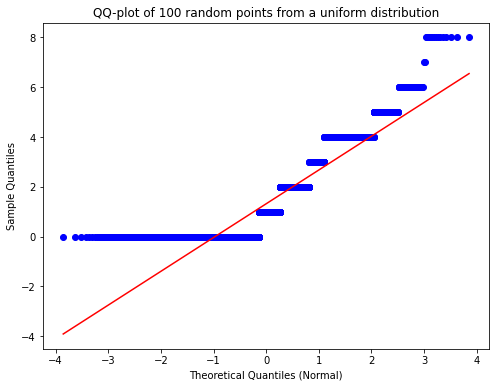

In [30]:
data_fr_Ar_N = df.fr_Ar_N
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
stats.probplot(data_fr_Ar_N, dist="norm", plot=ax)
plt.xlabel("Theoretical Quantiles (Normal)")
plt.ylabel("Sample Quantiles")
plt.title("QQ-plot of 100 random points from a uniform distribution")
plt.show()

In [31]:
p_value = stats.shapiro(data_fr_Ar_N)
print("Shapiro-Wilk p-value: ", p_value)

Shapiro-Wilk p-value:  ShapiroResult(statistic=0.8155250549316406, pvalue=0.0)


C:\Users\lucia\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


__R:__ Conforme o resultado do Shapiro Test, podemos confirmar que os dados da coluna fr_Ar_N não seguem uma distribuição normal pelo que vamos seguir para testes não paramétricos. Sendo que estamos perante variavéis independentes, iremos realizar o teste de _Kruskal-Wallis_.

In [32]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(hist_data_1, hist_data_2)
print("t-test statistic: {:.2f}".format(stat))
print("p-value: {:.20f}".format(p))

t-test statistic: 17205534.50
p-value: 0.00000000000002183092


__R:__ Sendo p_value menor que 0.05, rejeita-se H0, pelo que se conclui que não há evidências significativas de que as duas amostras sejam semelhantes.

### Correlação

Visto que estamos perante amostras que não seguem uma distribuição normal, para observar a correlação entre variáveis, temos que utilizar o __método de _spearman___ cujo o coeficiente varia entre -1 e 1.\
Quanto mais próximo de -1, significa uma correlação quase perfeita negativa e quanto mais próximo de 1, uma correlação quase perfeita positiva. Se o valor for muito próximo de zero, assume-se que não existe correlação.

In [33]:
corr_matrix_sp = df.corr(method = "spearman")
corr_matrix_sp

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
MaxEStateIndex,1.000000,-0.454620,1.000000,-0.430973,-0.202238,0.625949,0.629079,0.626667,0.635195,NaN,...,-0.024748,0.111939,0.052099,0.011812,-0.017468,0.003742,-0.011751,0.068628,-0.053263,0.104559
MinEStateIndex,-0.454620,1.000000,-0.454620,0.324846,0.233592,-0.295369,-0.307112,-0.295367,-0.275050,NaN,...,0.065517,-0.386583,-0.143924,-0.029194,0.016781,0.032210,0.013211,0.052837,0.009153,-0.024296
MaxAbsEStateIndex,1.000000,-0.454620,1.000000,-0.430973,-0.202238,0.625949,0.629079,0.626667,0.635195,NaN,...,-0.024748,0.111939,0.052099,0.011812,-0.017468,0.003742,-0.011751,0.068628,-0.053263,0.104559
MinAbsEStateIndex,-0.430973,0.324846,-0.430973,1.000000,0.111151,-0.309719,-0.305237,-0.310025,-0.317363,NaN,...,-0.009666,-0.057157,-0.057140,0.001826,-0.006773,0.005142,0.004968,0.025045,-0.013535,-0.072639
qed,-0.202238,0.233592,-0.202238,0.111151,1.000000,-0.493341,-0.503561,-0.493189,-0.452775,NaN,...,-0.115548,0.056504,0.021674,-0.056464,-0.016211,-0.005037,-0.001644,-0.035592,-0.149426,0.154229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,0.003742,0.032210,0.003742,0.005142,-0.005037,0.038887,0.046241,0.038147,-0.004907,NaN,...,0.047861,0.015737,-0.009340,-0.011456,-0.012227,1.000000,-0.002287,-0.004106,-0.020157,-0.015610
fr_thiocyan,-0.011751,0.013211,-0.011751,0.004968,-0.001644,-0.016608,-0.016457,-0.016613,-0.017126,NaN,...,0.039584,-0.003578,-0.001369,-0.000840,-0.001266,-0.002287,1.000000,-0.003297,-0.003466,-0.002735
fr_thiophene,0.068628,0.052837,0.068628,0.025045,-0.035592,0.072093,0.082705,0.071176,0.019116,NaN,...,0.038803,-0.015786,-0.013563,-0.011107,-0.006857,-0.004106,-0.003297,1.000000,-0.030709,-0.034817
fr_unbrch_alkane,-0.053263,0.009153,-0.053263,-0.013535,-0.149426,0.014066,0.002275,0.014197,0.033832,NaN,...,0.039303,-0.001021,0.000478,0.118460,-0.015833,-0.020157,-0.003466,-0.030709,1.000000,-0.012027


In [34]:
data_MaxEStateIndex = df.MaxEStateIndex
data_HeavyAtomMolWt = df.HeavyAtomMolWt

p_value = stats.shapiro(data_MaxEStateIndex)
print("Shapiro-Wilk p-value: ", p_value)

p_value = stats.shapiro(data_HeavyAtomMolWt)
print("Shapiro-Wilk p-value: ", p_value)

Shapiro-Wilk p-value:  ShapiroResult(statistic=0.7805706262588501, pvalue=0.0)
Shapiro-Wilk p-value:  ShapiroResult(statistic=0.9103512167930603, pvalue=0.0)


C:\Users\lucia\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


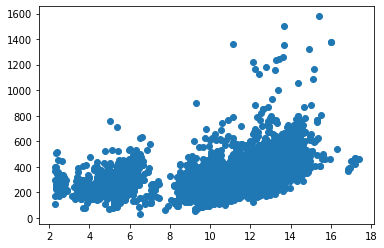

In [35]:
plt.scatter(data_MaxEStateIndex, data_HeavyAtomMolWt)
plt.show()

In [36]:
sp_corr, _ = stats.spearmanr(data_MaxEStateIndex, data_HeavyAtomMolWt)
sp_corr

0.6290792214353643

__R:__ Correlação com um coeficiente de spearman _maior que 0.5_, sendo uma correlação positiva relativamente forte.

In [37]:
data_num_valencia = df.NumValenceElectrons
data_max_partial_charge = df.MaxPartialCharge

p_value = stats.shapiro(data_num_valencia)
print("Shapiro-Wilk p-value: ", p_value)

p_value = stats.shapiro(data_max_partial_charge)
print("Shapiro-Wilk p-value: ", p_value)

Shapiro-Wilk p-value:  ShapiroResult(statistic=0.900000274181366, pvalue=0.0)
Shapiro-Wilk p-value:  ShapiroResult(statistic=0.9816015958786011, pvalue=1.7853521774968917e-36)


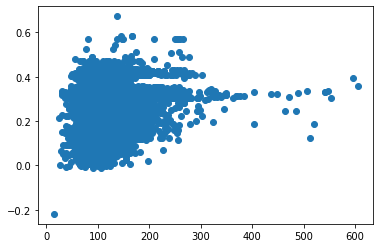

In [38]:
plt.scatter(data_num_valencia, data_max_partial_charge)
plt.show()

In [39]:
sp_corr, _ = stats.spearmanr(data_num_valencia, data_max_partial_charge)
sp_corr

0.20489211159052126

__R:__ Valor de coeficiente de correlação de spearman bastante próximo de zero, o que significa que não existe correlação entre as duas variáveis.

In [40]:
data_qed = df.qed

p_value = stats.shapiro(data_qed)
print("Shapiro-Wilk p-value: ", p_value)

Shapiro-Wilk p-value:  ShapiroResult(statistic=0.9658158421516418, pvalue=0.0)


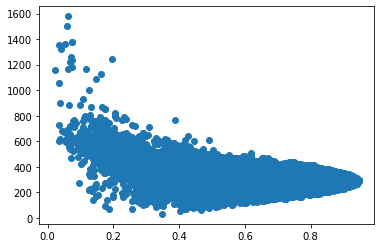

In [41]:
plt.scatter(data_qed, data_HeavyAtomMolWt)
plt.show()

In [42]:
sp_corr, _ = stats.spearmanr(data_qed, data_HeavyAtomMolWt)
sp_corr

-0.5035614639850797

__R:__ Correlação com um coeficiente de spearman _menor que 0_, sendo uma correlação negativa relativamente forte.

### Redução da Dimensionalidade - PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
n = 2
pca_cyp2c9 = PCA(n_components = n)
pca_cyp2c9.fit(data_scale)
x_reduced = pca_cyp2c9.transform(data_scale)

In [45]:
print(pca_cyp2c9.explained_variance_ratio_)

[0.17261402 0.07226995]


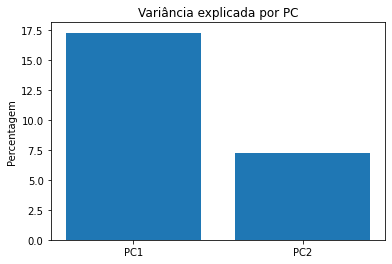

In [46]:
plt.bar(range(n), pca_cyp2c9.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC' + str(i) for i in range(1, n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

__R:__ A componente principal 1 explica a variância dos dados em cerca de 17.2% enquanto que a segunda componente principal explica em cerca de 7.2%

### Heatmap

In [47]:
import seaborn as sns

<AxesSubplot: ylabel='ids'>

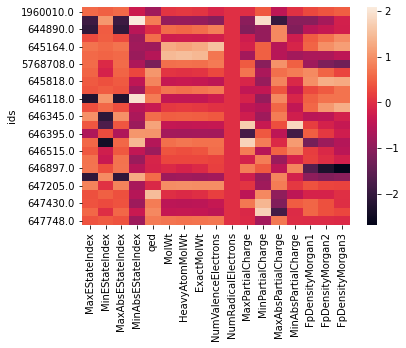

In [48]:
sns.heatmap(data_scale.iloc[:25,:17]) #seleção de apenas algumas colunas e linhas

__R:__ Através do Heatmap realizado, é possível ver a frequência de ocorrência por uma escala de -2 a 2, sendo que quanto mais negativo, mais escura é a cor e quanto mais positivo, mais clara.

### KMeans

In [49]:
from sklearn.cluster import KMeans

In [50]:
k = 2
kmeans_data = KMeans(n_clusters = k, max_iter = 1000)
kmeans_data.fit(x_reduced)
labels = kmeans_data.predict(x_reduced)

In [51]:
import pandas as pd
pd.crosstab(labels, data['Y'], rownames = ['inibition'])

Y,0,1
inibition,,
0,5552,2222
1,2357,1803


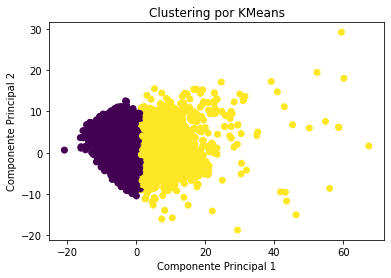

In [52]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=labels)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering por KMeans')
plt.show()

__R:__ Pelo gráfico de clustering por KMeans é possível verificar dois clusters, pela identificação de grupos de observações que são similares entre si. O primeiro, a roxo, é um cluster organizado e aglumerado enquanto que, o segundo a amarelo tem pontos mais dispersos.

### Clustering - Linkage + Dendrogram

In [53]:
import numpy as np

np.random.seed(126)
sample_indices = np.random.choice(x_reduced.shape[0], size=1000, replace=False)
x_sample = x_reduced[sample_indices, :]

In [54]:
from scipy.cluster.hierarchy import linkage

linkage_matrix = linkage(x_sample, method='ward')

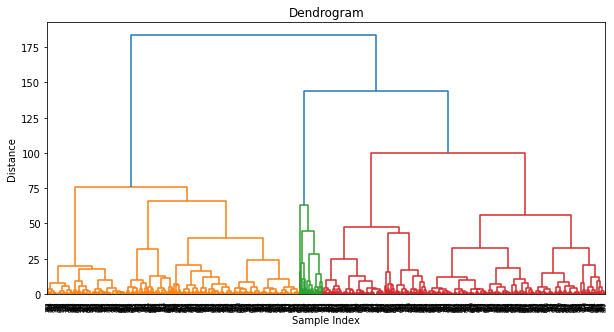

In [55]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(linkage_matrix, no_plot=True)

plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, color_threshold=0.7*max(linkage_matrix[:, 2]))
plt.show()

__R:__ Com uma seed = 126, conseguimos agrupar os nossos dados em 4 clusters, azul, laranja, verde e vermelho, significando que, cada um deles é semelhante entre si.

### Análise Preditiva

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [79]:
#Divisão para treino e teste do modelo

X_train, X_test, y_train, y_test = train_test_split(df, data['Y'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
#MODEL RANDOM FOREST

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy Random Forest:", round(rf_accuracy, 4))

Accuracy Random Forest: 0.8111


In [82]:
#MODEL SVM

svm = SVC()

svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy SVM:", round(svm_accuracy,4))

Accuracy SVM: 0.8127


In [83]:
#DEEP LEARNING

model = keras.Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

dl_pred = model.predict(X_test)
dl_pred_labels = (dl_pred > 0.5).astype(int)

dl_accuracy = accuracy_score(y_test, dl_pred_labels)
print("Accuracy Deep Learning:", round(dl_accuracy, 4))

Epoch 1/10
299/299 [==============================] - 4s 4ms/step - loss: 0.4549 - accuracy: 0.7863
Epoch 2/10
299/299 [==============================] - 1s 5ms/step - loss: 0.3978 - accuracy: 0.8233
Epoch 3/10
299/299 [==============================] - 2s 7ms/step - loss: 0.3713 - accuracy: 0.8339
Epoch 4/10
299/299 [==============================] - 2s 6ms/step - loss: 0.3529 - accuracy: 0.8500
Epoch 5/10
299/299 [==============================] - 2s 5ms/step - loss: 0.3334 - accuracy: 0.8613
Epoch 6/10
299/299 [==============================] - 1s 5ms/step - loss: 0.3183 - accuracy: 0.8695
Epoch 7/10
299/299 [==============================] - 1s 5ms/step - loss: 0.3001 - accuracy: 0.8727
Epoch 8/10
299/299 [==============================] - 2s 5ms/step - loss: 0.2845 - accuracy: 0.8809
Epoch 9/10
299/299 [==============================] - 1s 4ms/step - loss: 0.2693 - accuracy: 0.8924
Epoch 10/10
75/75 [==============================] - 0s 3ms/step
Accuracy Deep Learning: 0.8178


__R:__ Dentro dos modelos clássicos o que teve melhor desempenho, segundo a accuracy foi o SVM. No entanto o Deep Learning mostra uma accuracy superior comparativamente aos dois anteriores podendo ser a melhor opção. Contudo os 3 resultados foram dentro do mesmo espetro.

### Selecão/Importância de Variáveis

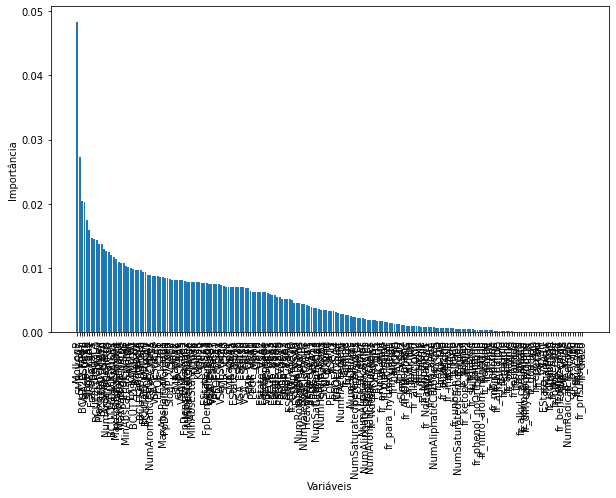

In [84]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = df.columns
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

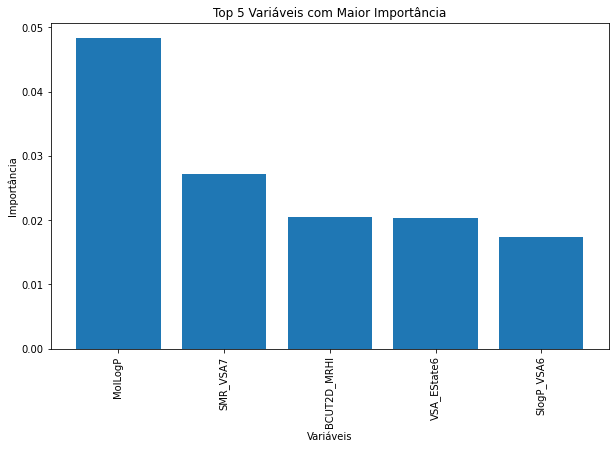

In [87]:
top_indices = indices[:5]
top_feature_names = feature_names[top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_indices)), top_importances)
plt.xticks(range(len(top_indices)), top_feature_names, rotation=90)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.title('Top 5 Variáveis com Maior Importância')
plt.show()

__R:__ Neste gráfico conseguimos visualizar melhor as 5 variáveis com mais importância, sendo que, a ```MolLogP``` detém um valor de quase 0.05, destacando-se das demais.

__MolLogP:__ significa _Wildman-Crippen LogP_ que simboliza uma medida que descreve a solubilidade relativa de uma substância em uma mistura de octanol e água.